In [49]:
import pandas as pd
from tensorflow import *
import numpy as np

### 2 classes: cats and dogs

In [50]:
train_ds_1, test_ds_1 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\data3",
    validation_split=0.2, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


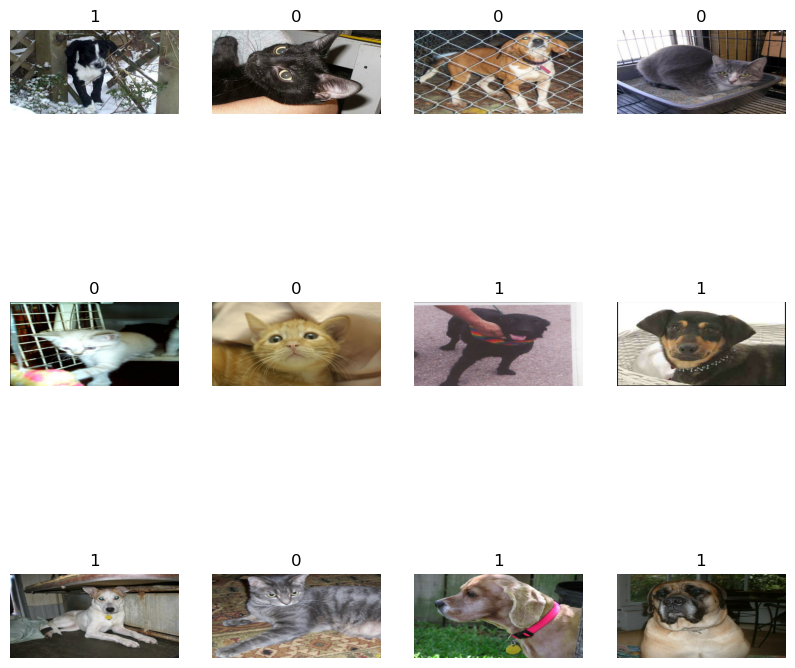

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Augmentation

In [52]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [53]:
for i in range(3):
    train_ds_1 = train_ds_1.map(
        lambda img, label: (data_augmentation(img), label)
    )

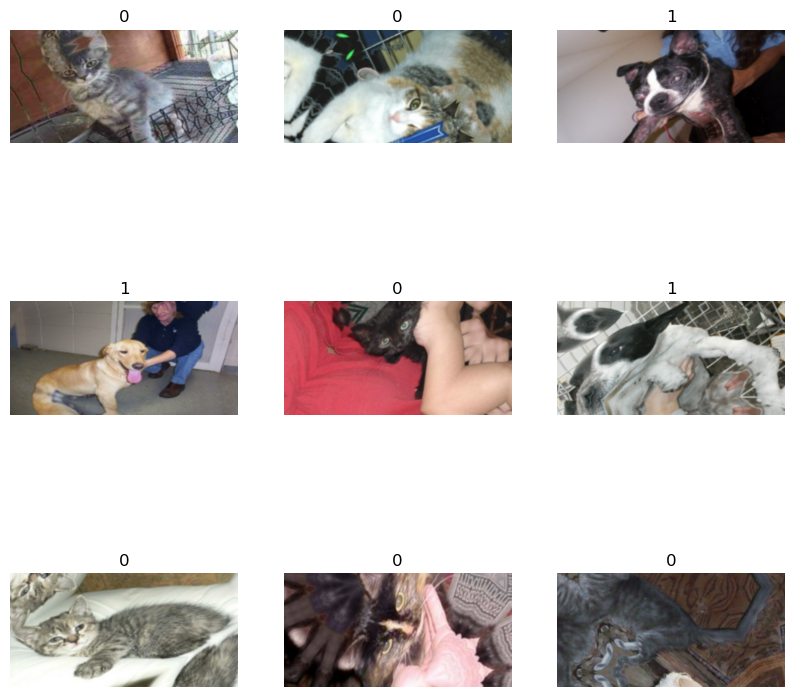

In [54]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### CNN

In [55]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Conv2D(256, 4, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(2, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)

In [56]:
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 200, 400, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 100, 128)      3584      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 25, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 7, 256)         524544    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 1, 2, 256)         0         
 g2D)                                                      

In [57]:
model1.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [58]:
model1.fit(train_ds_1, epochs=5, validation_data=test_ds_1)

Epoch 1/5
50/50 [==============================] - 21s 405ms/step - loss: 0.6859 - accuracy: 0.5656 - val_loss: 0.7020 - val_accuracy: 0.5400
Epoch 2/5
50/50 [==============================] - 21s 419ms/step - loss: 0.6773 - accuracy: 0.5813 - val_loss: 0.6658 - val_accuracy: 0.5825
Epoch 3/5
50/50 [==============================] - 21s 411ms/step - loss: 0.6854 - accuracy: 0.5650 - val_loss: 0.6712 - val_accuracy: 0.5575
Epoch 4/5
50/50 [==============================] - 21s 410ms/step - loss: 0.6695 - accuracy: 0.5794 - val_loss: 0.6431 - val_accuracy: 0.6100
Epoch 5/5
50/50 [==============================] - 20s 407ms/step - loss: 0.6744 - accuracy: 0.5525 - val_loss: 0.6762 - val_accuracy: 0.5550


In [59]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\cats\4113.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 44ms/step
array([[0.67, 0.33]], dtype=float32)


In [60]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\dogs\132.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 14ms/step
array([[0.55, 0.45]], dtype=float32)


### 3 classes: Аккордионы, гитары и дикие котики

In [61]:
train_ds_2, test_ds_2 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\datapack",
    validation_split=0.15, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 164 files belonging to 3 classes.
Using 140 files for training.
Using 24 files for validation.


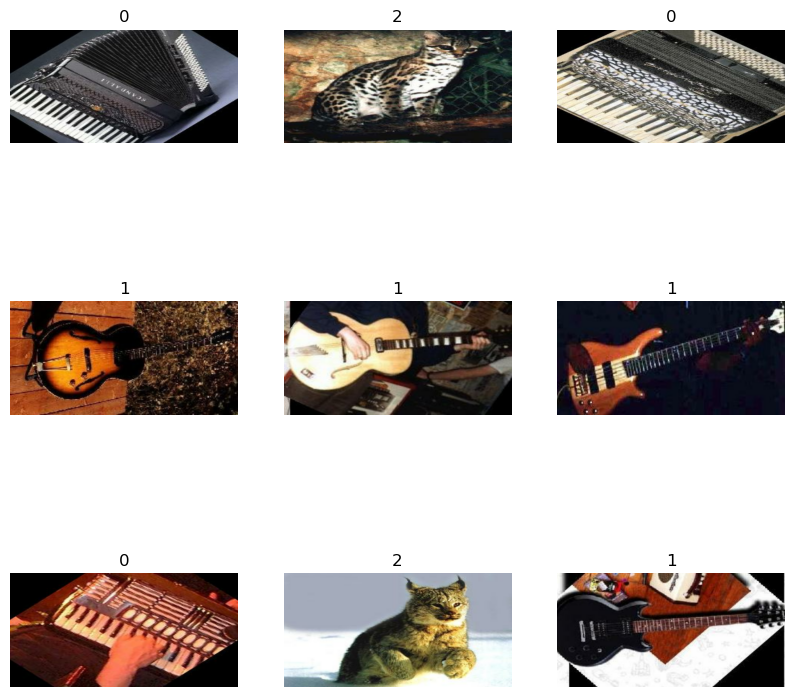

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [63]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [64]:
for i in range(4):
    train_ds_2 = train_ds_2.map(
        lambda img, label: (data_augmentation(img), label)
    )

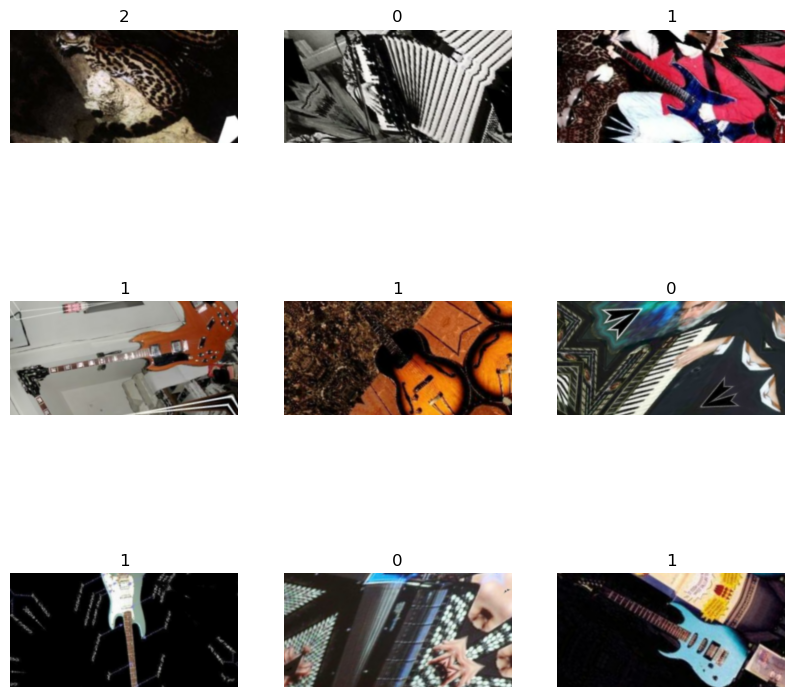

In [65]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [66]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(64, 3, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(128, 4, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)

In [67]:
model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 200, 400, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 67, 134, 64)       1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 23, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 15, 128)        131200    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 3, 5, 128)         0         
 g2D)                                                      

In [68]:
model2.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [69]:
model2.fit(train_ds_2, epochs=25, validation_data=test_ds_2)

Epoch 1/25
5/5 [==============================] - 3s 463ms/step - loss: 1.1153 - accuracy: 0.3429 - val_loss: 1.0631 - val_accuracy: 0.7500
Epoch 2/25
5/5 [==============================] - 2s 444ms/step - loss: 0.9695 - accuracy: 0.5786 - val_loss: 0.7620 - val_accuracy: 0.7083
Epoch 3/25
5/5 [==============================] - 2s 449ms/step - loss: 0.8915 - accuracy: 0.6286 - val_loss: 0.8325 - val_accuracy: 0.6667
Epoch 4/25
5/5 [==============================] - 2s 450ms/step - loss: 0.8871 - accuracy: 0.5786 - val_loss: 0.5797 - val_accuracy: 0.7500
Epoch 5/25
5/5 [==============================] - 2s 453ms/step - loss: 0.8405 - accuracy: 0.6143 - val_loss: 0.7120 - val_accuracy: 0.7083
Epoch 6/25
5/5 [==============================] - 3s 452ms/step - loss: 0.8391 - accuracy: 0.6214 - val_loss: 0.5986 - val_accuracy: 0.7500
Epoch 7/25
5/5 [==============================] - 2s 449ms/step - loss: 0.7561 - accuracy: 0.7071 - val_loss: 0.7763 - val_accuracy: 0.5833
Epoch 8/25
5/5 [====

In [70]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\accordion\image_0037.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)

print(np.around(predictions, 3))

1/1 [==============================] - 0s 46ms/step
array([[0.996, 0.   , 0.004]], dtype=float32)


In [71]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\wild_cat\image_0012.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 13ms/step
array([[0.154, 0.001, 0.845]], dtype=float32)


In [72]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\electric_guitar\image_0045.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 13ms/step
array([[0.014, 0.885, 0.101]], dtype=float32)


In [73]:
model2.save("./models/lab8/model_3_classes_ishak")

FailedPreconditionError: . is not a directory